In [10]:
import pandas as pd
df = pd.read_csv("combined_output.csv")
df

,name,rating,time,comment,title
0,掉线,1,2016-06-08 02:37:32,【C-】我看过剪辑最烂的电影之一，不夸张地说剪辑水平几乎是小时代的级别，基本的剪辑点不对，基...,Warcraft
1,二月鸟语,2,2016-06-06 19:19:51,点映看两遍，看得昏昏欲睡，无聊至极。故事又老又俗套又狗血不说，故事都没讲明白，打来打去都没高...,Warcraft
2,rainmanyuan,2,2016-06-07 22:59:42,故事一般，特效凑合，排片量太大了，ume23:59居然排了8场，加上0点的，2点的午夜场一共...,Warcraft
3,地平线的旧火车,1,2016-06-08 07:53:24,魔兽≈周星驰现在的电影≈小时代……,Warcraft
4,放心办事员小李,2,2016-05-31 04:05:04,你们的世界好难懂…为什么人类首领那么弱…为什么人类首领不会魔法…为什么会魔法的隐居了还要被揪...,Warcraft
...,...,...,...,...,...
2255,1先森,2,2018-05-17 22:40:25,作为一个启承作用的一块拼图，这部电影真正的价值可能需要从未来续作的结果来判断，但从路人视角单...,Avengers: Infinity War
2256,此号废弃,1,2018-05-14 12:07:45,灭霸这个反派从根子上是不合理的。你预测到隔壁邻居即将诞生的儿子在未来会长成希特勒一样的黑暗首...,Avengers: Infinity War
2257,麻友安,1,2018-05-13 22:29:46,令人智熄。。。,Avengers: Infinity War
2258,momo,2,2018-06-28 22:17:14,最反感漫威的一点：\n把死亡当做一种消费动力而不是叙事动力。\n一遍一遍的“硬死亡”“轮回死...,Avengers: Infinity War


In [16]:
imdb = pd.read_csv("imdb_combined_output.csv")
imdb

,title,comment,rating
0,Aquaman,"I rarely post reviews, but after watching this...",1
1,Aquaman,"SORRY JASON MAMOA, WE CANT LET AMBER HEARD RID...",1
2,Aquaman,"Too much water 0/10 ifi could give it that, if...",1
3,Aquaman,Oh seriously Amber Heard is the most untalente...,1
4,Aquaman,Very short review required Poor on all levels!...,1
...,...,...,...
1827,Zootopia,"After just seeing the movie with my friends, I...",4
1828,Zootopia,A cute female rabbit becomes a police officer ...,4
1829,Zootopia,"""I cordially dislike allegory in all its manif...",4
1830,Zootopia,"I know I'm in the minority here, but I just do...",4


In [2]:
# import jieba
# import jieba.posseg as pseg
# from collections import Counter
# import numpy as np
# df['segmented'] = df['comment'].apply(lambda x: ' '.join(jieba.cut(x)) if pd.notna(x) else '')

In [ ]:
comments = df["comment"].dropna().tolist()

In [3]:
df['title'].value_counts().sum()

np.int64(2260)

In [4]:
from sentence_transformers import SentenceTransformer

# Use a multilingual model or a specific Chinese one
model = SentenceTransformer("shibing624/text2vec-base-chinese")
# For more accurate results with Chinese: "shibing624/text2vec-base-chinese"

embeddings = model.encode(comments, show_progress_bar=True)

/Users/elimarx/miniconda3/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Batches: 100%|██████████| 71/71 [00:14<00:00,  4.97it/s]


In [5]:
from sklearn.cluster import KMeans

num_clusters = 6  # tweak this
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(embeddings)

df['cluster'] = labels

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [7]:
for cluster_num in sorted(df['cluster'].unique()):
    print(f"\nCluster {cluster_num}:")
    #problem here where some of the clusters only have one comment in them
    sample_comments = df[df['cluster'] == cluster_num]['comment'].sample(4, random_state=42)
    for comment in sample_comments:
        print(" -", comment)


Cluster 0:
 - 用电影里的场景可以完美地形容这部电影。你以为这是一场街头打斗吗？这就是一场街头打斗。也许大屏幕下，观众的荷尔蒙能高涨吧。可惜我是在YouTube上看的盗版。
 - 记得大学时有个老师形容这个电影一眼就从嗓子眼看到底
 - 并没玩过游戏甚至没看人玩过，全程什么鬼。出来后对基友说I don't understand though... （about that magic thing）基友说：what? I don't know what to understand in this movie, or not to understand so to speak．2333322
 - 2023.12.17 IMAX3D，with泽泽and瑞瑞。顶着新冠发烧看，很蓝很暴力，世界观特效缺乏想象力，剧情几十年如一日，

Cluster 1:
 - 恶俗到无法理解的史诗级粪作
 - 情绪稳定。甚至冷漠。.jpg
 - 太俗套太无聊太让人精神失常了。很想学女主的绕柱子大法。
 - 又臭又长，看你下次怎么编

Cluster 2:
 - 并不欣赏这个故事，尤其讨厌那只兔子。
 - 完全看不来这类电影……
 - 狗屎电影，年度烂片
 - 并没有那么好看

Cluster 3:
 - 烂的平平无奇，连反派的恶行都设计的小心翼翼。 还有一个槽点，人类都已经在太空殖民了，捕鲸的方式还真是够传统的呀
 - 我很喜爱蜘蛛侠  但不是这只夜候 看完感觉吃了屎
 - 那两个小孩的演技完全出戏啊…
 - 一颗星送给Duncan Jones，愿你在那边一切都好。

Cluster 4:
 - 如果动画片因为“故事”与“人物”曾经可爱过，它如今已完全变成了考试作文一样虚假的东西。左派艺术家不再投入幻想中的故事而试图把现实幻想化，只能是一种灾难。哪怕是幼稚的个体自我实现的故事都比这样强行将虚拟的理想化自我人格对位到现实中可爱而真诚一些。
 - PW一走，8这一部已然把速激系列变得套路和夸张化，家庭车战肉搏反派一气堆叠，再无亮点。僵尸车流与高楼车雨这段还可以。
 - 用迅猛龙追捕霸王龙，这种很有观赏性的傻逼主意，除非那个男主是导演的大舅子，否则我是不明白他怎么能同意的
 - 不行，真不行。求求您别那么搞好吗。为啥小蜘蛛这么好一个角色非要疯狂强调下一个Tony Stark，世界只有一

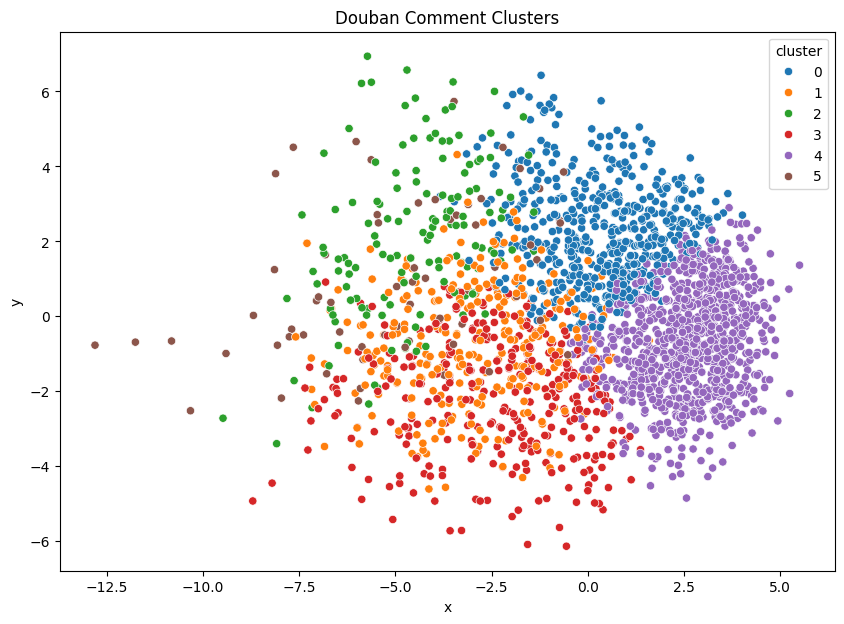

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

df['x'] = reduced[:, 0]
df['y'] = reduced[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='x', y='y', hue='cluster', palette='tab10')
plt.title("Douban Comment Clusters")
plt.show()

In [13]:
from keybert import KeyBERT

kw_model = KeyBERT(model)
for i in range(num_clusters):
    cluster_comments = df[df['cluster'] == i]['comment'].tolist()
    joined = " ".join(cluster_comments)
    keywords = kw_model.extract_keywords(joined, top_n=5)
    print(f"Cluster {i} keywords:", keywords)

Cluster 0 keywords: [('烂到我怀疑环球是不是为了坑传奇故意派的人毁掉电影的', 0.8132), ('分镜头瞎比用使得本该是一部宏大如指环王的电影变成了一部纯粹粉丝向的电影', 0.7881), ('基本把这种类型的烂片所会出现的问题全部犯了一遍', 0.7552), ('内地带的字幕问题和片中如此大量镜头留着2d平面没转3d也能看出这片做的是多赶', 0.7344), ('就这种剧情和剪辑', 0.733)]
Cluster 1 keywords: [('只知道炒作情怀的垃圾', 0.701), ('怎么可以这么烂的故事', 0.6964), ('只是为了平衡不知道是水军还是脑残粉的五星', 0.6888), ('什么垃圾剧本啊', 0.6817), ('剧情安排惊人白痴', 0.6766)]
Cluster 2 keywords: [('片子真的不太好看', 0.7315), ('大概是我近期看过最烂的片了吧', 0.7174), ('对我最差的部分是好不容易看完还要给朋友解释为什么不喜欢', 0.7089), ('这一部是最烂的', 0.6962), ('一部几乎可以称之为烂片的电影', 0.6922)]
Cluster 3 keywords: [('为什么会魔法的隐居了还要被揪出来打架', 0.6956), ('为什么每次都把沧龙放预告片吸引观众然后正片就露个脸', 0.6631), ('作为人类这个能拍出变形金刚系列并大卖特卖的族群中的一员', 0.6631), ('暴雪的粉丝千万别给引出好奇心来', 0.6502), ('只有负一星才能治疗我看这片尬出的内伤', 0.6442)]
Cluster 4 keywords: [('大法也是生生把一个可以r级出彩的片子阉割成了现在这种插科打诨卖萌卖腐的漫威劣质跟风作', 0.7747), ('可乱入更甚的本片愣给你一本正经极尽煽情地演成了王者归来最后一战', 0.7519), ('剧情叙事乱七八糟敢情贝导你还想爆米花大片拍成邪典迷幻感', 0.7497), ('讲真就整体而言与平庸的霍比特人差了有1万部指环王', 0.7458), ('我对这种俗套的高大全半人半神兄弟相残幼稚阴谋打打闹闹傻逼导师总是东方道士头丑陋的海底黄金圣斗士盔甲以及各种流行元素都要来一点的屎一样的大杂烩一脚踢翻', 0

In [31]:
from keybert import KeyBERT
import jieba

kw_model = KeyBERT(model)
for i in range(num_clusters):
    cluster_comments = df[df['cluster'] == i]['comment'].tolist()
    joined = " ".join(cluster_comments)
    fixed = jieba.cut(joined)
    str = " ".join(fixed)
    keywords = kw_model.extract_keywords(str, top_n=5)
    print(f"Cluster {i} keywords:", keywords)

Cluster 0 keywords: [('有完没完', 0.6215), ('最烂', 0.6137), ('没完没了', 0.6125), ('很烂', 0.6047), ('好烂', 0.604)]
Cluster 1 keywords: [('一塌糊涂', 0.6561), ('真是', 0.6382), ('太烂', 0.6081), ('看不下去', 0.6013), ('一堆', 0.5997)]
Cluster 2 keywords: [('很烂', 0.64), ('好烂', 0.5961), ('看不下去', 0.59), ('最烂', 0.5898), ('烂片', 0.5722)]
Cluster 3 keywords: [('第一个', 0.6063), ('搞个', 0.5848), ('真是', 0.5835), ('一个', 0.5784), ('還有', 0.5756)]
Cluster 4 keywords: [('有完没完', 0.6416), ('真是', 0.6074), ('一塌糊涂', 0.6071), ('没完没了', 0.6048), ('废戏', 0.5964)]
Cluster 5 keywords: [('好觉', 0.5951), ('困得', 0.5838), ('呼呼大睡', 0.5743), ('睡过', 0.5538), ('昏昏欲睡', 0.542)]


In [35]:
import jieba
import jieba.posseg as pseg
from keybert import KeyBERT

kw_model = KeyBERT(model)
stopwords = set(open('chinese_stopwords.txt', encoding='utf-8').read().split())

for i in range(num_clusters):
    cluster_comments = df[df['cluster'] == i]['comment'].tolist()
    joined = " ".join(cluster_comments).lower()

    # POS filter
    words = pseg.cut(joined)
    tokens = [w.word for w in words if (w.flag.startswith('n') or w.flag.startswith('a') or w.flag.startswith('v'))
              and w.word not in stopwords and len(w.word.strip()) > 1]

    # Generate candidate unigrams and filtered bigrams
    candidates = set()
    for j in range(len(tokens)):
        candidates.add(tokens[j])
        if j < len(tokens) - 1:
            bigram = tokens[j] + tokens[j + 1]
            # skip bigrams with stopwords
            if tokens[j] not in stopwords and tokens[j + 1] not in stopwords:
                candidates.add(bigram)

    keywords = kw_model.extract_keywords(
        joined,
        candidates=list(candidates),
        top_n=5,
        use_mmr=True,
        diversity=0.7
    )
    print(f"Cluster {i} keywords:", keywords)

Cluster 0 keywords: [('剪辑奇烂', 0.6915), ('没了', 0.4588), ('儿童趣味', 0.2736), ('爵迹', 0.2574), ('土著爱情', 0.2438)]
Cluster 1 keywords: [('剧情硬伤', 0.6201), ('粗鄙庸俗', 0.5175), ('不想评论', 0.3295), ('儿戏', 0.2534), ('肥皂泡沫', 0.2334)]
Cluster 2 keywords: [('烂片无误', 0.657), ('不想说话', 0.3806), ('眉拉很漂亮', 0.3032), ('狗屎电影', 0.3017), ('地球脉动', 0.2835)]
Cluster 3 keywords: [('有完没完', 0.5521), ('哈喇子横飞', 0.3711), ('蓝精灵', 0.3553), ('學好英語', 0.2955), ('印度人', 0.2487)]
Cluster 4 keywords: [('冗长无趣', 0.6643), ('通灵小女孩', 0.1855), ('爸爸温柔体贴', 0.1606), ('追车', 0.14), ('枪炮', 0.0561)]
Cluster 5 keywords: [('看到睡着', 0.5698), ('男主太丑', 0.4368), ('失望', 0.4168), ('特效', 0.4104), ('一盘散沙', 0.4052)]


In [39]:
df['cluster'].value_counts()

cluster
4    912
0    527
3    323
1    291
2    140
5     67
Name: count, dtype: int64

In [17]:
df[['title', 'cluster']].value_counts().unstack()

KeyError: "['cluster'] not in index"

In [ ]:
fixed = jieba.cut(joined)
print(type())  # 全模式

<class 'str'>


In [10]:
df['cluster'].value_counts()

cluster
4    912
0    527
3    323
1    291
2    140
5     67
Name: count, dtype: int64